# <a id='toc1_'></a>[Data Project - Zbx336 & Cng782](#toc0_)


### <a id='toc1_'></a>[Importing and looking at our data](#toc0_)


In [1]:
# Importing and showing data

!pip install yfinance
!pip install pandas-datareader


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime
import statsmodels.api as sm


plt.style.use("fivethirtyeight")

DOW = yf.Ticker("^dji")
SP500= yf.Ticker("^GSPC")
NASDAQ= yf.Ticker("^IXIC")
INTEREST_RATE=yf.Ticker("^TNX")

# get all stock info
DOW.info
SP500.info
NASDAQ.info
INTEREST_RATE.info

# get historical market data
data_period = "1996-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')
DOW = DOW.history(start=data_period,end=end_date)
SP500 = SP500.history(start=data_period,end=end_date)
NASDAQ = NASDAQ.history(start=data_period,end=end_date)
INTEREST_RATE = INTEREST_RATE.history(start=data_period,end=end_date)

DOW.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-02 00:00:00-05:00,5115.700195,5184.680176,5098.330078,5177.450195,39910000,0.0,0.0
1996-01-03 00:00:00-05:00,5177.100098,5207.080078,5176.370117,5194.069824,44760000,0.0,0.0
1996-01-04 00:00:00-05:00,5191.200195,5227.310059,5139.879883,5173.839844,52010000,0.0,0.0
1996-01-05 00:00:00-05:00,5173.100098,5181.790039,5133.379883,5181.430176,35530000,0.0,0.0
1996-01-08 00:00:00-05:00,5181.100098,5207.080078,5179.979980,5197.700195,11090000,0.0,0.0


In [2]:
# Plotting index prices in absolute values


period=["1996-01-01","1996-01-01","2006-01-01","2016-01-01"]
period_end=["2023-04-14","2006-01-01","2016-01-01","2023-04-14"]

def make_plot(x,y):
    plt.figure(figsize=(10, 6))
    plt.title(f'Indecies ({x} - {y})')
    plt.ylabel('Index prices')
    plt.plot(NASDAQ['Close'][x:y], color="black", label='NASDAQ')
    plt.plot(DOW['Close'][x:y], color='blue',label='DOW')
    plt.plot(SP500['Close'][x:y], color='navy',label='SP500')
    plt.legend()
    plt.show()

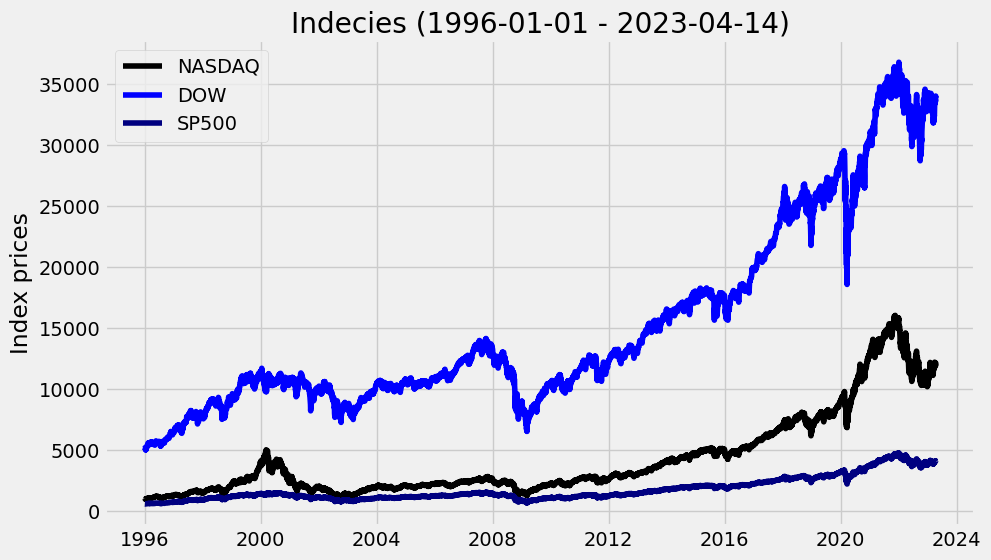

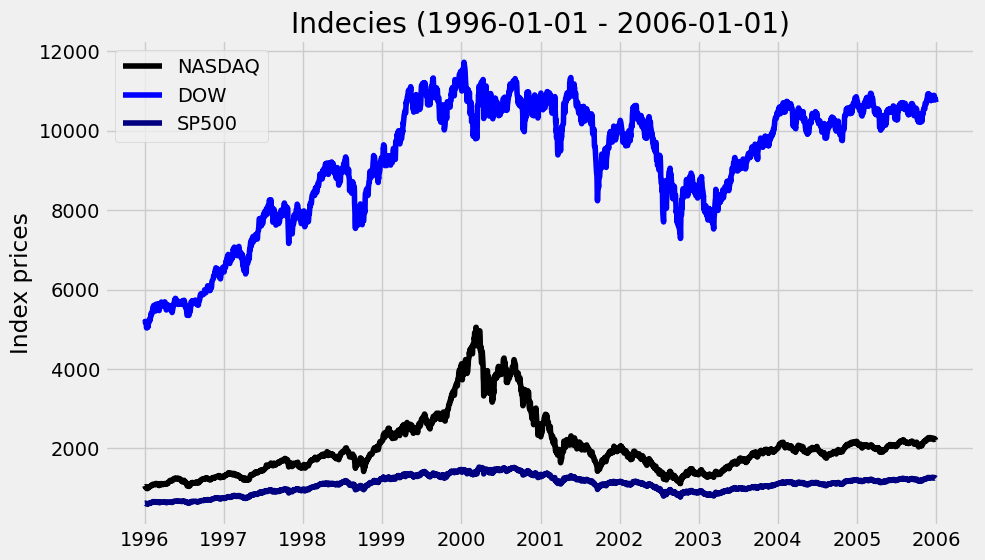

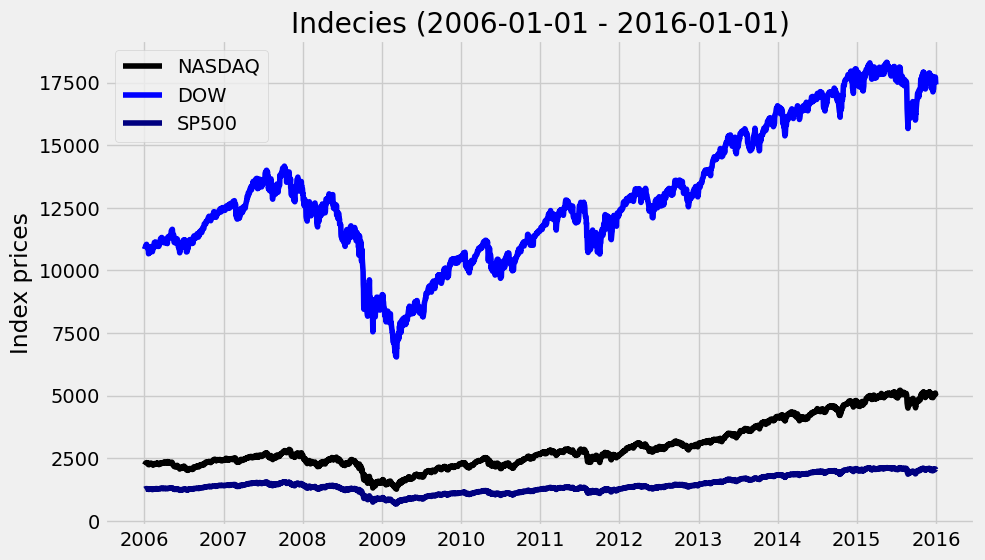

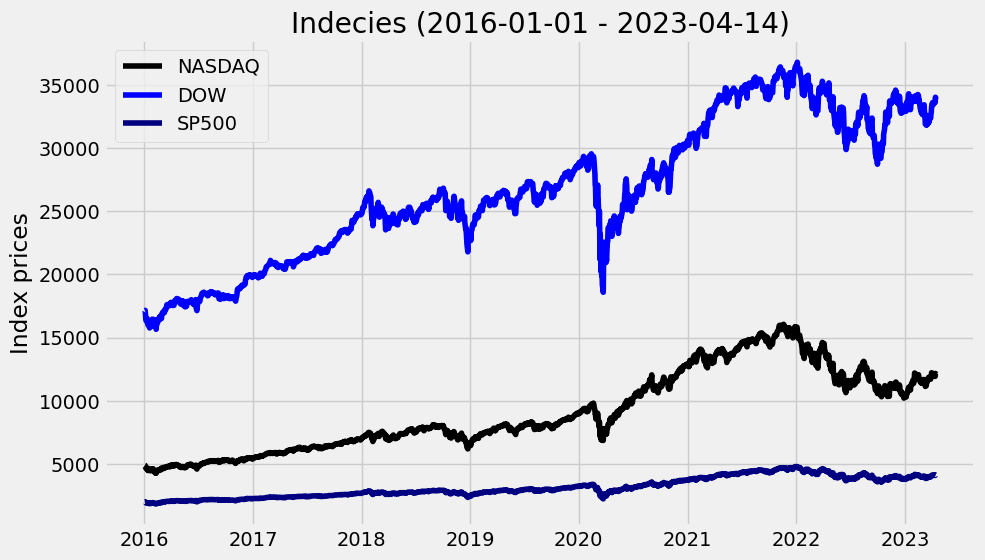

In [3]:
for x in range(len(period)):
    make_plot(period[x],period_end[x])

*******

### <a id='toc1_'></a>[Cleaning the data and indexing](#toc0_)


In [4]:

# Finding missing values across index (if there is any)

print(NASDAQ.index.difference(SP500.index, sort=False))
print(NASDAQ.index.difference(DOW.index, sort=False))
print(SP500.index.difference(DOW.index, sort=False))

DatetimeIndex([], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
DatetimeIndex([], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
DatetimeIndex([], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)


In [5]:
# Get name from DataFrame
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [6]:
# Rename columns in DataFrame
def rename_columns(k):
    k.rename(columns = {'Close':f'{get_df_name(k)}'}, inplace = True)
    k.rename(columns = {'Volume':f'{get_df_name(k)}_V'}, inplace = True)

In [7]:
# Renaming our columns
rename_columns(DOW)
rename_columns(SP500)
rename_columns(NASDAQ)
rename_columns(INTEREST_RATE)
SP500.head()

,Open,High,Low,SP500,SP500_V,Dividends,Stock Splits
Date,,,,,,,
1996-01-02 00:00:00-05:00,615.929993,620.739990,613.169983,620.729980,364180000,0.0,0.0
1996-01-03 00:00:00-05:00,620.729980,623.250000,619.559998,621.320007,468950000,0.0,0.0
1996-01-04 00:00:00-05:00,621.320007,624.489990,613.960022,617.700012,512580000,0.0,0.0
1996-01-05 00:00:00-05:00,617.700012,617.700012,612.020020,616.710022,437110000,0.0,0.0
1996-01-08 00:00:00-05:00,616.710022,618.460022,616.489990,618.460022,130360000,0.0,0.0


In [8]:
# Creating af DataFrame for the three indecies 

df=pd.DataFrame(SP500[["SP500","SP500_V"]], index=SP500.index)
df=pd.concat([df,NASDAQ[['NASDAQ','NASDAQ_V']]],ignore_index = False,axis=1)
df=pd.concat([df,DOW[['DOW','DOW_V']]],ignore_index = False,axis=1)
df=pd.concat([df,INTEREST_RATE['INTEREST_RATE']],ignore_index = False,axis=1)

df.head()

,SP500,SP500_V,NASDAQ,NASDAQ_V,DOW,DOW_V,INTEREST_RATE
Date,,,,,,,
1996-01-02 00:00:00-05:00,620.729980,364180000,1058.650024,399620000,5177.450195,39910000,5.587
1996-01-03 00:00:00-05:00,621.320007,468950000,1046.260010,506550000,5194.069824,44760000,5.566
1996-01-04 00:00:00-05:00,617.700012,512580000,1029.819946,629970000,5173.839844,52010000,5.619
1996-01-05 00:00:00-05:00,616.710022,437110000,1033.469971,548130000,5181.430176,35530000,5.677
1996-01-08 00:00:00-05:00,618.460022,130360000,1032.369995,142690000,5197.700195,11090000,5.673


In [9]:
# Cleaning data, indexing 2013 = 100


def to_index(list_name,index_name):
    for y in range(len(period)):
        df[f'{list_name}_{y}']=index_name[period[y]:]/index_name[period[y]:][0]*100



to_index('index_NASDAQ',df['NASDAQ'])
to_index('index_DOW',df['DOW'])
to_index('index_SP500',df['SP500'])

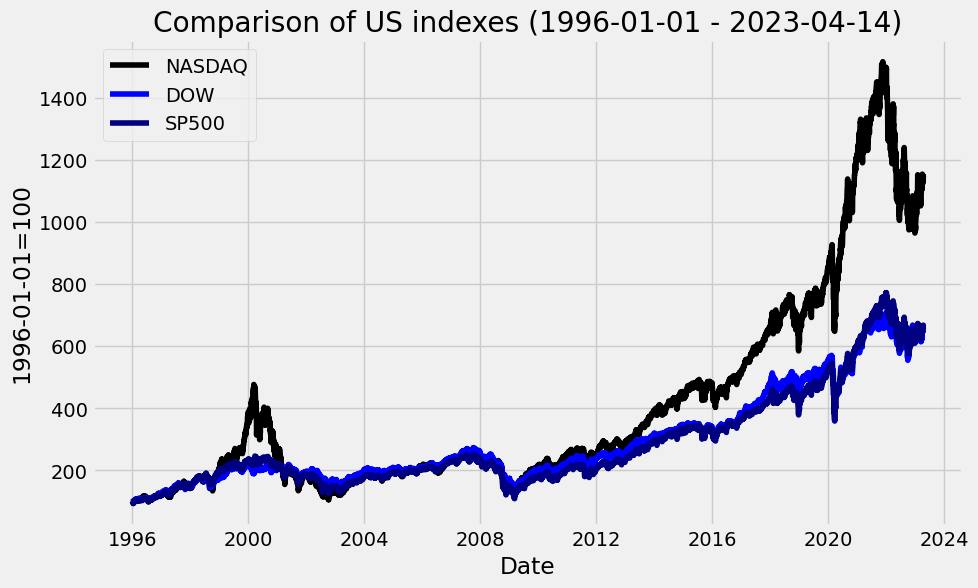

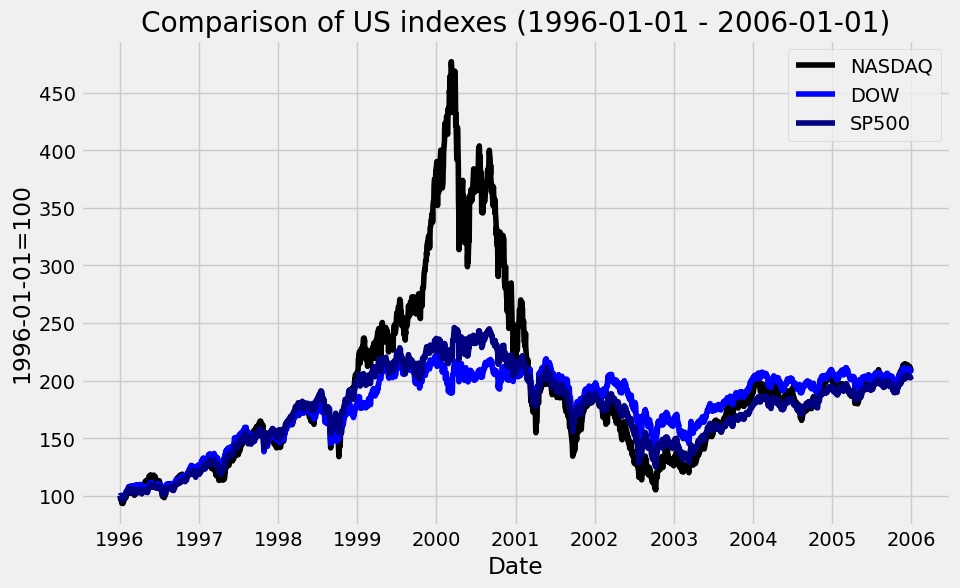

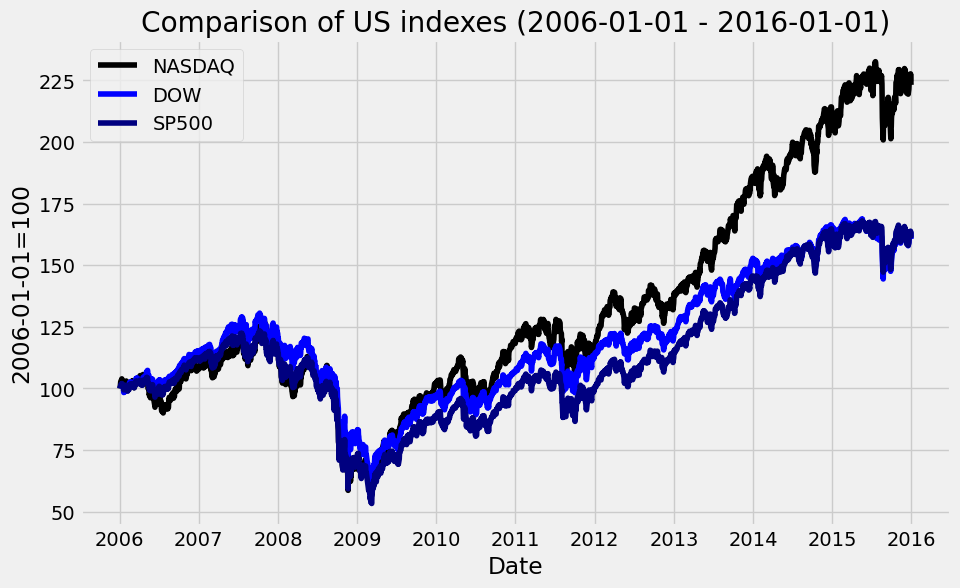

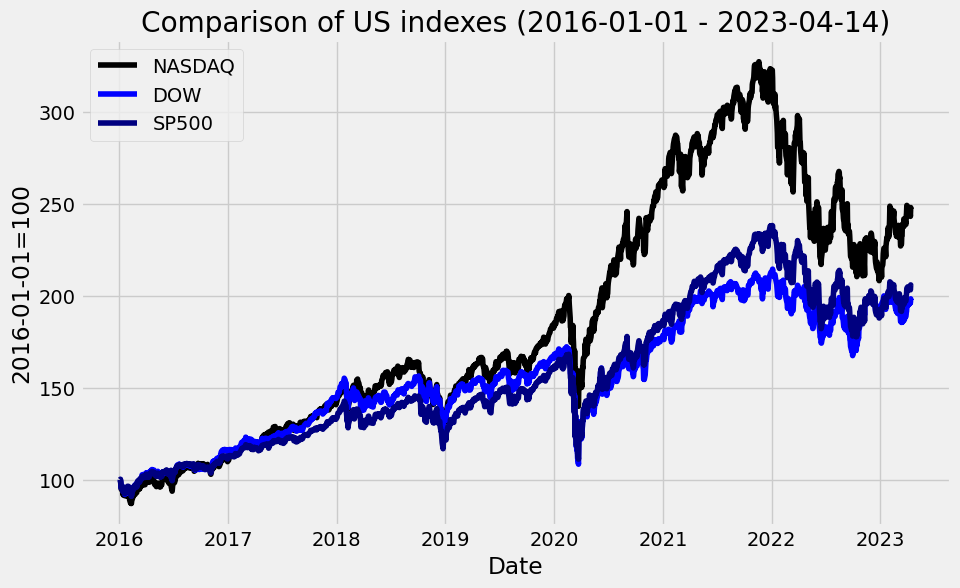

In [10]:
# Plotting the data in a figure and comparing the returns since 1993

def index_plot(x,y,z):
        plt.figure(figsize=(10, 6))
        plt.plot(df[f'index_NASDAQ_{z}'][x:y], color="black", label=f'NASDAQ')
        plt.plot(df[f'index_DOW_{z}'][x:y], color='blue',label=f'DOW')
        plt.plot(df[f'index_SP500_{z}'][x:y], color='navy',label=f'SP500')
        plt.title(f'Comparison of US indexes ({x} - {y})')
        plt.ylabel(f'{x}=100')
        plt.xlabel('Date')
        plt.legend()
        plt.show()

for x in range(len(period)):
    index_plot(period[x],period_end[x],x)

From 1996-2023 there have been positive returns for each of the three stock indexes (NASDAQ, Dow Jones and S&P 500) with large fluctuations around the Dot-com bubble (2000-2002), Financial Crisis (2007) and latest the Corona Pandemic. 

The Nasdaq index had the highest return over the entire period and outperformed the other indicies in the sub periods after 2006. Nasdaq has remained a strong performer in the recent periode from 2016-2023, mainly driven by the strong performance of technology companies. 

The S&P 500, consists of a broader range of companies than Nasdaq and a large variety of sectors. The S&P 500 have performed well doing each period, in general it can be seen that both SP500 and Dow Jones are less volatile than the Nasdaq index. S&P 500 

The Dow Jones has had a slightly lower return compared to the other indicies during the period. The Dow Jones index consists of a larger amount of industrial companies, which tends to be more "safe" investment and less volatile.  

*******

### <a id='toc1_'></a>[Regression analysis with indicies as independent variables, and interest rate as explanatory](#toc0_)

In [11]:

# Creating log/log variables for our regression model

# Defining function for log:
data_log=pd.DataFrame()
def log_indexes(list_name):
    #for y in range(len(period)):
    data_log[f'{list_name}_log']=np.log(df[list_name])


# Using the function to take log and drop missing values:
log_indexes("SP500")
log_indexes("NASDAQ")
log_indexes("DOW")
log_indexes("INTEREST_RATE")

data_log = data_log.dropna()
data_log.head()



,SP500_log,NASDAQ_log,DOW_log,INTEREST_RATE_log
Date,,,,
1996-01-02 00:00:00-05:00,6.430896,6.964750,8.552068,1.720442
1996-01-03 00:00:00-05:00,6.431846,6.952977,8.555273,1.716677
1996-01-04 00:00:00-05:00,6.426003,6.937139,8.551370,1.726154
1996-01-05 00:00:00-05:00,6.424399,6.940677,8.552836,1.736423
1996-01-08 00:00:00-05:00,6.427233,6.939612,8.555972,1.735718


In [12]:
# Defining regression model and regress each index with our explanatory variable (interest rate):

def ols_regression(x,y):
    model = sm.OLS(data_log[x].values, sm.add_constant(data_log[y].values))
    results = model.fit()
    print(results.summary())

In [13]:
# DOW regression

ols_regression('DOW_log','INTEREST_RATE_log')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     6653.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        19:52:32   Log-Likelihood:                -2250.6
No. Observations:                6881   AIC:                             4505.
Df Residuals:                    6879   BIC:                             4519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2813      0.010   1012.703      0.0

In [14]:
# SP500 regression

ols_regression('SP500_log','INTEREST_RATE_log')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     5379.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        19:52:32   Log-Likelihood:                -2828.5
No. Observations:                6881   AIC:                             5661.
Df Residuals:                    6879   BIC:                             5675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0979      0.011    733.391      0.0

In [15]:
# NASDAQ regression

ols_regression('NASDAQ_log','INTEREST_RATE_log')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     6069.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        19:52:32   Log-Likelihood:                -5071.3
No. Observations:                6881   AIC:                         1.015e+04
Df Residuals:                    6879   BIC:                         1.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1984      0.015    601.341      0.0

The regression coefficients for the interest rate are negative in all three regressions, indiciating an increase in the rate will lead to a decrease in returns for all indicies. 

We notice that all F-statistics are statistically significant (p-values < 0.05). Which means there is strong evidence that we can reject the null-hypothesis of the regression line is zero. 
In other words, there is evidence to support the conclusion about the negative relationship between stock returns and the interest rate. We further notice that the standard errors are small, which  indicates that the estimated coefficients are quite precise.


The results from our regressions are in line with our guesses. By looking at the coefficients we notice that the interest rate has a larger impact on the returns for the Nasdaq index than the others. 

The Nasdaq index is more sensitive due to the type of companies in the index (tech and growth stocks), which tend to have higher valuations based on future earnings rather than current earnings. This can be interpreted as the present value of their future cash flows is due to a larger discount rate. A higher interest rate increase the cost of borrowing, potentially leading to a decrease in investment and earnings. 

The Dow Jones and S&P 500 indicies are more diverse and consists of a broader range of companies, such as value stocks and blue-chip, which tend to have lower valuations and more stable present earnings. These types of companies may benefit from a moderat increase in rates, because it tends to be correlated with a stronger economy and larger corporate profits. 